In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [7]:
import os
from PIL import Image
import os
from PIL import Image
import matplotlib.pyplot as plt


In [5]:
import numpy as np

In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader


In [3]:

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
from torch.utils.tensorboard import SummaryWriter
from sklearn.metrics import accuracy_score

In [4]:
import os
import random
import glob
import torch
from torchvision import datasets, transforms
from PIL import Image

# Read the data

In [ ]:

# Path to the folder containing the images
folder_path = '/content/drive/MyDrive/Ali/Data/Healthy'

# Get the list of files in the folder
files = os.listdir(folder_path)

In [ ]:
files

['Spectrogram_Subject_3_Signal_616.png',
 'Spectrogram_Subject_3_Signal_606.png',
 'Spectrogram_Subject_3_Signal_604.png',
 'Spectrogram_Subject_3_Signal_607.png',
 'Spectrogram_Subject_3_Signal_600.png',
 'Spectrogram_Subject_3_Signal_614.png',
 'Spectrogram_Subject_3_Signal_603.png',
 'Spectrogram_Subject_3_Signal_615.png',
 'Spectrogram_Subject_3_Signal_602.png',
 'Spectrogram_Subject_3_Signal_610.png',
 'Spectrogram_Subject_3_Signal_609.png',
 'Spectrogram_Subject_3_Signal_608.png',
 'Spectrogram_Subject_3_Signal_617.png',
 'Spectrogram_Subject_3_Signal_605.png',
 'Spectrogram_Subject_3_Signal_611.png',
 'Spectrogram_Subject_3_Signal_613.png',
 'Spectrogram_Subject_3_Signal_601.png',
 'Spectrogram_Subject_3_Signal_612.png',
 'Spectrogram_Subject_3_Signal_625.png',
 'Spectrogram_Subject_3_Signal_638.png',
 'Spectrogram_Subject_3_Signal_632.png',
 'Spectrogram_Subject_3_Signal_629.png',
 'Spectrogram_Subject_3_Signal_630.png',
 'Spectrogram_Subject_3_Signal_634.png',
 'Spectrogram_Su

In [ ]:

# Take the first two images
first_image_path = os.path.join(folder_path, files[0])
second_image_path = os.path.join(folder_path, files[1])


In [ ]:
first_image_path

'/content/drive/MyDrive/Ali/Data/Healthy/Spectrogram_Subject_3_Signal_616.png'

In [ ]:

# Load the images using PIL
first_image = Image.open(first_image_path)
second_image = Image.open(second_image_path)

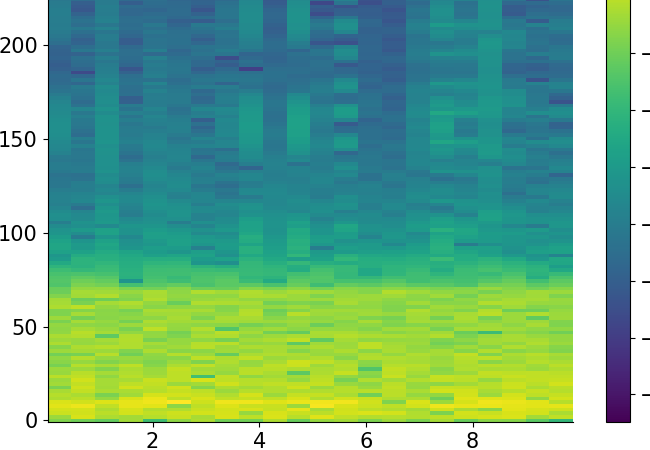

In [ ]:
first_image

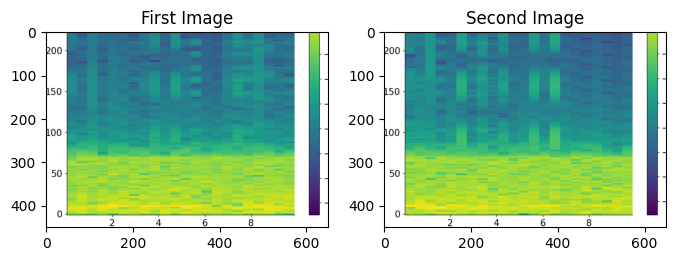

In [ ]:



# Plot the images using Matplotlib
plt.figure(figsize=(8, 4))

# Plot the first image
plt.subplot(1, 2, 1)
plt.imshow(first_image)
plt.title('First Image')

# Plot the second image
plt.subplot(1, 2, 2)
plt.imshow(second_image)
plt.title('Second Image')

# Show the plots
plt.show()


In [ ]:
image_shape = first_image.size


In [ ]:
image_shape

(650, 450)

In [ ]:
first_image_array = np.array(first_image)


In [ ]:
first_image_array.shape

(450, 650, 4)

# Dataloader

In [ ]:
import os
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image

# Define the path to your data folders
healthy_folder = '/content/drive/MyDrive/Ali/Data/Healthy'
bipolar_folder = '/content/drive/MyDrive/Ali/Data/Bipolar'

# Define the trans


In [ ]:
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # Convert to 3-channel grayscale

    transforms.Resize((256, 256)),  # Resize the image
    transforms.ToTensor()  # Convert the image to a PyTorch tensor
])

In [ ]:

# Define a custom dataset class
class CustomDataset(Dataset):
    def __init__(self, folder_path, transform=None):
        self.folder_path = folder_path
        self.transform = transform
        self.file_list = os.listdir(folder_path)

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        img_name = os.path.join(self.folder_path, self.file_list[idx])
        image = Image.open(img_name)

        if self.transform:
            image = self.transform(image)

        # Assuming label 0 for 'Healthy' and label 1 for 'Bipolar'
        label = 0 if 'Healthy' in self.folder_path else 1

        return image, label

In [ ]:


# Create datasets for the healthy and bipolar folders
healthy_dataset = CustomDataset(healthy_folder, transform=transform)
bipolar_dataset = CustomDataset(bipolar_folder, transform=transform)


In [ ]:
healthy_dataset

In [ ]:
# Access the first element in the dataset
sample_image, sample_label = healthy_dataset[0]
print(f"Image shape: {sample_image.shape}, Label: {sample_label}")


Image shape: torch.Size([3, 256, 256]), Label: 0


In [ ]:
# Access the first element in the dataset
sample_image, sample_label = bipolar_dataset[0]
print(f"Image shape: {sample_image.shape}, Label: {sample_label}")


Image shape: torch.Size([3, 256, 256]), Label: 1


In [ ]:
from torch.utils.data.dataset import Subset

# Assuming label 0 for 'Healthy' and label 1 for 'Bipolar'
healthy_indices = list(range(len(healthy_dataset)))
bipolar_indices = list(range(len(bipolar_dataset)))


In [ ]:

# Shuffle the indices
random.shuffle(healthy_indices)
random.shuffle(bipolar_indices)


In [ ]:

# Split the indices into training and validation sets
healthy_train_size = int(0.8 * len(healthy_indices))
bipolar_train_size = int(0.8 * len(bipolar_indices))


In [ ]:


healthy_train_indices = healthy_indices[:healthy_train_size]
healthy_val_indices = healthy_indices[healthy_train_size:]

In [ ]:


bipolar_train_indices = bipolar_indices[:bipolar_train_size]
bipolar_val_indices = bipolar_indices[bipolar_train_size:]


In [ ]:

# Create Subset datasets using the selected indices
healthy_train_dataset = Subset(healthy_dataset, healthy_train_indices)
healthy_val_dataset = Subset(healthy_dataset, healthy_val_indices)

In [ ]:


bipolar_train_dataset = Subset(bipolar_dataset, bipolar_train_indices)
bipolar_val_dataset = Subset(bipolar_dataset, bipolar_val_indices)

# Combine the datasets into training and validation datasets
train_dataset = torch.utils.data.ConcatDataset([healthy_train_dataset, bipolar_train_dataset])
val_dataset = torch.utils.data.ConcatDataset([healthy_val_dataset, bipolar_val_dataset])


In [ ]:
from torch.utils.data import DataLoader

# Create DataLoader for training and validation
batch_size = 16
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


In [ ]:
import torch.nn as nn
import torch.nn.functional as F


In [ ]:

class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super(ConvolutionalNetwork, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=1, padding=3)
        self.pool1 = nn.MaxPool2d(kernel_size=3, stride=3, padding=0)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=5, stride=1, padding=2)
        self.pool2 = nn.MaxPool2d(kernel_size=3, stride=3, padding=0)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=5, stride=1, padding=2)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=3, padding=0)

        # Fully connected layers
        self.fc1 = nn.Linear(256 * 9 * 9, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 2)  # Output has 2 classes

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = F.relu(self.conv3(x))
        x = self.pool3(x)

        # Flatten before passing to fully connected layers
        x = x.view(-1, 256 * 9 * 9)

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)

        return F.log_softmax(x, dim=1)


In [ ]:
torch.manual_seed(42)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
  (pool1): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool2): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(128, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool3): MaxPool2d(kernel_size=2, stride=3, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=20736, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=64, bias=True)
  (fc5): Linear(in_features=64, out_features=2, bias=True)
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
import time
start_time = time.time()

epochs = 25
train_losses = []
test_losses = []
train_correct = []
test_correct = []

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0

    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_dataloader):
        b += 1

        # Move data to the same device as the model
        X_train, y_train = X_train.to(device), y_train.to(device)

        # Apply the model
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)

        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr

        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print interim results
        if b % len(train_dataloader) == 0:
            train_loss = loss.item()
            train_acc = trn_corr.item() * 100 / (b * 16)
            print(f'Epoch {i + 1}, Batch {b}, Training Loss: {train_loss:.4f}, Training Accuracy: {train_acc:.2f}%')

    train_losses.append(loss)
    train_correct.append(trn_corr)

    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(val_dataloader):

            # Move data to the same device as the model
            X_test, y_test = X_test.to(device), y_test.to(device)

            # Apply the model
            y_val = model(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1]
            tst_corr += (predicted == y_test).sum()

        val_loss = criterion(y_val, y_test).item()
        val_acc = tst_corr.item() * 100 / len(val_dataloader.dataset)
        print(f'Epoch {i + 1}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.2f}%')

    test_losses.append(val_loss)
    test_correct.append(tst_corr)

print(f'\nDuration: {time.time() - start_time:.0f} seconds')  # Print the time elapsed


Epoch 1, Batch 10, Training Loss: 0.6767, Training Accuracy: 50.00%
Epoch 1, Validation Loss: 0.6156, Validation Accuracy: 50.00%
Epoch 2, Batch 10, Training Loss: 0.7021, Training Accuracy: 50.00%
Epoch 2, Validation Loss: 0.6373, Validation Accuracy: 50.00%
Epoch 3, Batch 10, Training Loss: 0.6992, Training Accuracy: 50.00%
Epoch 3, Validation Loss: 0.6593, Validation Accuracy: 50.00%
Epoch 4, Batch 10, Training Loss: 0.6927, Training Accuracy: 46.25%
Epoch 4, Validation Loss: 0.6862, Validation Accuracy: 50.00%
Epoch 5, Batch 10, Training Loss: 0.7084, Training Accuracy: 50.00%
Epoch 5, Validation Loss: 0.6391, Validation Accuracy: 50.00%
Epoch 6, Batch 10, Training Loss: 0.6944, Training Accuracy: 50.00%
Epoch 6, Validation Loss: 0.6437, Validation Accuracy: 50.00%
Epoch 7, Batch 10, Training Loss: 0.6936, Training Accuracy: 50.00%
Epoch 7, Validation Loss: 0.6589, Validation Accuracy: 50.00%
Epoch 8, Batch 10, Training Loss: 0.6898, Training Accuracy: 50.00%
Epoch 8, Validation Lo